## **Another way using PCA**
To follow closely your lecturer's method

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import os

# Python notebook cell to show more output, rather than just showing the last
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# pandas option to show more columns, rather than truncating some in the middle
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', -1)

In [2]:
data = pd.read_csv("cars.csv")
# change Drive to numeric values
drive_types = data['Drive'].unique()
print(drive_types)
for i in range(len(data)):
    if data.loc[i,'Drive']==drive_types[0]: data.loc[i,'Drive']=0
    if data.loc[i,'Drive']==drive_types[1]: data.loc[i,'Drive']=1
    if data.loc[i,'Drive']==drive_types[2]: data.loc[i,'Drive']=2
data_reduced = data.drop(['Vehicle Name','Type'], axis=1)    # drop 'Vehicle Name' and 'Type' from column (axis=1)
data_reduced.head(20)

['Front-wheel' 'All-wheel' 'Rear-wheel']


,Drive,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
0,0,43755,39014,3.5,6,225,18,24,3880,115,197,72
1,0,46100,41100,3.5,6,225,18,24,3893,115,197,72
2,1,36945,33337,3.5,6,265,17,23,4451,106,189,77
3,2,89765,79978,3.2,6,290,17,24,3153,100,174,71
4,0,23820,21761,2.0,4,200,24,31,2778,101,172,68
5,0,33195,30299,3.2,6,270,20,28,3575,108,186,72
6,0,26990,24647,2.4,4,200,22,29,3230,105,183,69
7,0,25940,23508,1.8,4,170,22,31,3252,104,179,70
8,0,35940,32506,1.8,4,170,23,30,3638,105,180,70
9,0,42490,38325,3.0,6,220,20,27,3814,105,180,70


In [0]:
# use sklearn StandardScaler to standardize the data to mean 0, standard deviation 1,  Z=(X-u)/s
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
scaled_data_reduced  = scaler.fit_transform(data_reduced)
# Note after scaler.fit_transform(), the return scaled_data_reduced is a numpy array, and the columns keys are all lost
# so we create a DataFrame for the scaled_data_reduced, using the columns keys from data_reduced
scaled_data_reduced_df = pd.DataFrame(scaled_data_reduced, columns = data_reduced.keys())

# print to visualize the scaled_data_reduced
for i in range(len(scaled_data_reduced)):
  print('{0:2d}-->'.format(i),end="")
  for j in range(len(scaled_data_reduced[i])):
      print('{0:1d}:{1:7.4f}  '.format(j,scaled_data_reduced[i][j]),end="")
  print('')
  if i==10: break    # just show the first 10 rows

# use the pd.DataFrame.corr() to get the correlation matrix
data_reduced_corr = data_reduced.corr()
print(data_reduced_corr)

 0-->0:-0.8211  1: 0.5342  2: 0.4795  3: 0.3678  4: 0.1632  5: 0.1504  6:-0.4400  7:-0.5798  8: 0.4929  9: 1.1004  10: 0.9106  11: 0.2151  
 1-->0:-0.8211  1: 0.6533  2: 0.5962  3: 0.3678  4: 0.1632  5: 0.1504  6:-0.4400  7:-0.5798  8: 0.5113  9: 1.1004  10: 0.9106  11: 0.2151  
 2-->0: 0.3735  1: 0.1885  2: 0.1620  3: 0.3678  4: 0.1632  5: 0.7205  6:-0.6303  7:-0.7575  8: 1.3027  9:-0.1712  10: 0.3055  11: 1.7014  
 3-->0: 1.5682  1: 2.8699  2: 2.7708  3: 0.0717  4: 0.1632  5: 1.0767  6:-0.6303  7:-0.5798  8:-0.5382  9:-1.0190  10:-0.8291  11:-0.0822  
 4-->0:-0.8211  1:-0.4777  2:-0.4855  3:-1.1129  4:-1.1806  5:-0.2058  6: 0.7016  7: 0.6638  8:-1.0700  9:-0.8777  10:-0.9804  11:-0.9740  
 5-->0:-0.8211  1:-0.0018  2:-0.0079  3: 0.0717  4: 0.1632  5: 0.7917  6:-0.0595  7: 0.1308  8: 0.0603  9: 0.1114  10: 0.0786  11: 0.2151  
 6-->0:-0.8211  1:-0.3168  2:-0.3241  3:-0.7181  4:-1.1806  5:-0.2058  6: 0.3211  7: 0.3085  8:-0.4290  9:-0.3125  10:-0.1483  11:-0.6767  
 7-->0:-0.8211  1:-0

In [0]:
# implementing PCA using sklearn
from sklearn.decomposition import PCA
pca = PCA(n_components=7).fit(scaled_data_reduced_df)
# Note that since the data is now standardized and scaled, pca.transform() will be computing using 
# the correlation matrix, and returns scores based on centred data

In [0]:
# This is the code from lecturer 
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs
def pca_results(data, pca):
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions
    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions
    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

In [9]:
# note that pca_results() needs a DataFrame input
pca_res = pca_results(scaled_data_reduced_df, pca)
pca_res
# from the sorted eigenvalues, we can take the first 2 PCs

,Eigenvalue,Explained Variance,Drive,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
PC 1,7.3233,0.6087,-0.1760,-0.2674,-0.2660,-0.3418,-0.3315,-0.3185,0.3061,0.3025,-0.3274,-0.2549,-0.2441,-0.2858
PC 2,2.1136,0.1757,0.3756,0.4049,0.4063,-0.0393,0.0539,0.2401,0.0180,0.0096,-0.1876,-0.4066,-0.4100,-0.3142
PC 3,0.8562,0.0712,-0.1117,0.2889,0.2913,0.0476,0.0816,0.1009,0.5227,0.5862,-0.1095,0.2396,0.3291,0.0742
PC 4,0.5909,0.0491,-0.8757,0.2315,0.2339,-0.0525,-0.0960,0.1594,-0.1449,-0.1463,0.0686,-0.1735,-0.0684,-0.0741
PC 5,0.3471,0.0288,0.1908,0.2403,0.2479,-0.5303,-0.6260,-0.0965,-0.1687,-0.1070,0.0999,0.2718,0.1667,0.1017
PC 6,0.2761,0.0230,0.0062,0.0499,0.0370,0.0492,-0.1282,-0.1216,0.3254,0.0397,0.3972,-0.2217,-0.4561,0.6633
PC 7,0.1981,0.0165,-0.0272,0.0338,0.0499,0.0143,0.0970,-0.2013,0.2495,-0.0825,0.5474,0.4368,-0.3113,-0.5376


[Text(0, 0.5, 'Eigenvalue'),
 Text(0.5, 0, 'Component number'),
 Text(0.5, 1.0, 'Screeplot')]

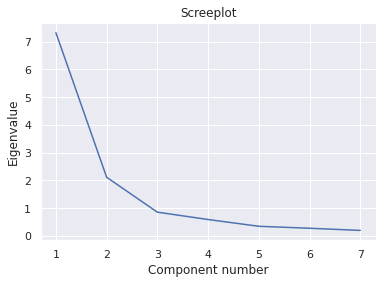

In [10]:
#Scree plot
import matplotlib.ticker as ticker
#plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()
# shows that we can just take the first 2 PCs

In [0]:
# So we extract only the two PCs
pca2 = PCA(n_components=2).fit(scaled_data_reduced_df)
scores2 = pca2.transform(scaled_data_reduced_df)

In [0]:
# This is copied from lecture
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.1
    for i, v in enumerate(pca.components_.T):
        #print(i, v)
        ax.arrow(0, 0, v[0], v[1], head_width=0.1, head_length=0.1, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

<function matplotlib.pyplot.clf>

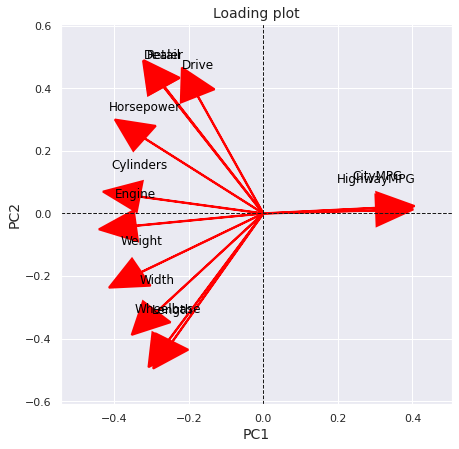

In [13]:
plt.clf
ax = loadingplot(scaled_data_reduced_df, pca2, width=7, height=7, margin=0.2)
plt.show()

In [15]:
# compute the mean of all 5 Types Sedan SUV Sports Wagon Minivan  
Sedan_mean = np.mean(scaled_data_reduced_df[data['Type']=='Sedan'])
SUV_mean = np.mean(scaled_data_reduced_df[data['Type']=='SUV'])
Sports_mean = np.mean(scaled_data_reduced_df[data['Type']=='Sports'])
Wagon_mean = np.mean(scaled_data_reduced_df[data['Type']=='Wagon'])
Minivan_mean = np.mean(scaled_data_reduced_df[data['Type']=='Minivan'])
Type_mean_vectors = pd.concat([ Sedan_mean, SUV_mean, Sports_mean, Wagon_mean, Minivan_mean], axis=1)
Type_mean_vectors = Type_mean_vectors.T
#Type_mean_vectors

types = pd.DataFrame([ 'Sedan', 'SUV', 'Sports', 'Wagon', 'Minivan' ], columns=['Type'])
Type_mean_vectors_data = pd.concat( [types, Type_mean_vectors], axis=1)
Type_mean_vectors_data

,Type,Drive,Retail,Dealer,Engine,Cylinders,Horsepower,CityMPG,HighwayMPG,Weight,Wheelbase,Length,Width
0,Sedan,-0.147222,-0.176369,-0.170873,-0.225315,-0.161271,-0.208706,0.282842,0.379104,-0.310914,-0.013635,0.073075,-0.258772
1,SUV,-0.071941,0.073392,0.061650,0.734249,0.504865,0.286651,-0.781895,-1.179033,1.227418,0.484950,0.190103,0.789458
2,Sports,1.010658,1.074348,1.058060,0.249367,0.312524,0.949730,-0.321650,-0.263966,-0.336870,-1.088081,-0.918170,-0.161462
3,Wagon,0.160189,-0.192742,-0.181874,-0.319662,-0.244749,-0.246560,0.103602,0.054695,-0.094912,-0.186372,-0.207774,-0.252057
4,Minivan,-0.536683,-0.286125,-0.293962,0.339622,0.035221,-0.186164,-0.403800,-0.419066,0.864421,1.369555,0.896179,1.347525


In [16]:
# Get the scores from the Type mean vectors
scores_scaled_Types = np.dot(Type_mean_vectors, pca2.components_.T)
scores_scaled_Types = pd.DataFrame(scores_scaled_Types, columns = ['PC1', 'PC2'])
scores_scaled_Types

,PC1,PC2
0,0.678096,-0.122121
1,-1.926399,-0.683974
2,-0.758375,2.404077
3,0.590243,0.108805
4,-1.305560,-2.014253


In [0]:
# This is copied from lecture
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot
def scoreplot_label(data, scores, pca, width=5, height=5, margin=0.5):
    plt.figure(figsize=(width, height))
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores)
    text_pos=0.1
    for i in range(len(data)):
       ax.text(scores['PC1'][i], scores['PC2'][i]+text_pos, data['Type'][i], color='black', ha='center', va='center', fontsize=12)
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    return ax

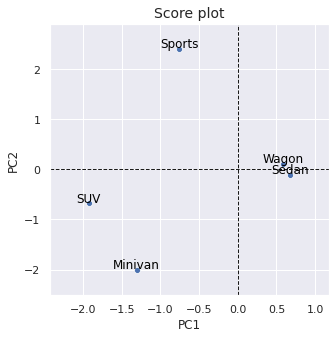

In [18]:
ax = scoreplot_label(Type_mean_vectors_data, scores_scaled_Types, pca2, width=5, height=5, margin=0.5)
plt.show()
# (i)  Big size, not so expensive, but not so much horsepower.
# (ii) Small size, expensive, but a lot of horsepower.

# **Question 2**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import os

# Python notebook cell to show more output, rather than just showing the last
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# pandas option to show more columns, rather than truncating some in the middle
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 20)
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', -1)

In [19]:
iris = pd.read_csv("iris.csv")
#print(iris)
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


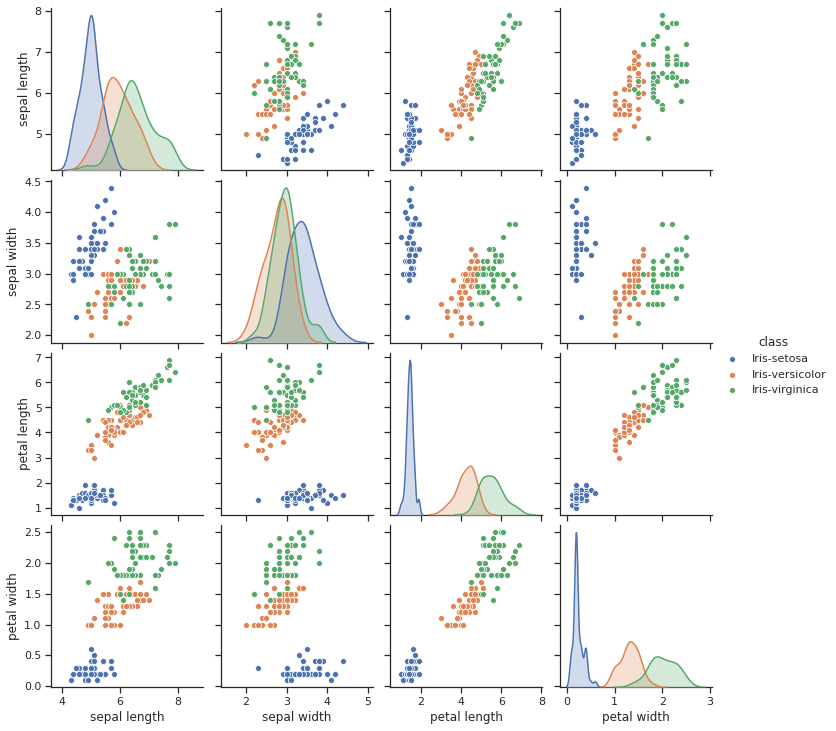

In [20]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(iris, hue='class')
plt.show()